# **Hypothesis testing in the Gaussian case**
---
 
- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [32]:
import numpy as np
import numpy.random as rd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Null hypothesis $H_0:\theta=0$ vs the alternative hypothesis $H_1:\theta=1$

### Generating an iid sample

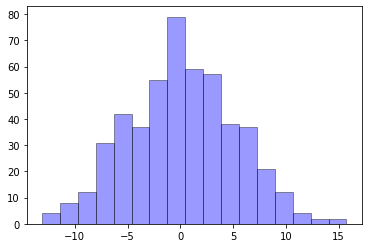

In [45]:
theta, sigma, n = 0.05, 5., 500
X = rd.normal(theta, sigma, n)
sns.distplot(X, hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'});

### Hypothesis testing

In [46]:
def hypothesisTest(X, alpha): ## defines the lower bound of the critical region
    ## Generates an iid centered Gaussian random sample with variance sigma^2
    XBar = np.mean(X)
    c = sigma*norm.ppf(1.-alpha) / np.sqrt(len(X))
    if XBar > c: ## Rejection region
        msg = "Reject H0"
    else: 
        msg = "Do not reject H0"
    return c, XBar, msg

In [47]:
alpha = 0.05
c, XBar, msg = hypothesisTest(X, alpha)
print("Lower bound of the rejection region: %.3f" %c)
print("Empirical mean: %.3f" %XBar)
print(msg)

Lower bound of the rejection region: 0.368
Empirical mean: 0.136
Do not reject H0


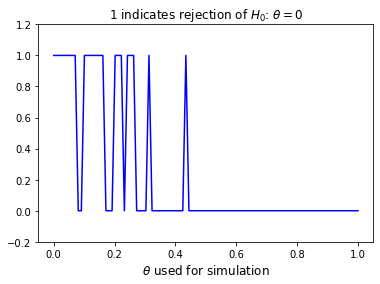

In [50]:
tt = np.linspace(0., 1., 100)
vals = []
for theta in tt:
    Xtemp = rd.normal(theta, sigma, 1000)
    c, XBar, msg = hypothesisTest(Xtemp, alpha)
    if XBar > c: vals.append(0.)
    else: vals.append(1.)    
        
plt.plot(tt, vals, 'b')
plt.title(r"$1$ indicates rejection of $H_0$: $\theta=0$", size=12)
plt.xlabel(r"$\theta$ used for simulation", size=12)
plt.ylim(-0.2, 1.2)
plt.show()

Under the null hypothesis $H_0$, the empirical mean $\overline{X}$ is distributed as $N\left(0, \frac{\sigma^2}{n}\right)$.
Under the alternative hypothesis $H_1$, the empirical mean $\overline{X}$ is distributed as $N\left(1, \frac{\sigma^2}{n}\right)$.

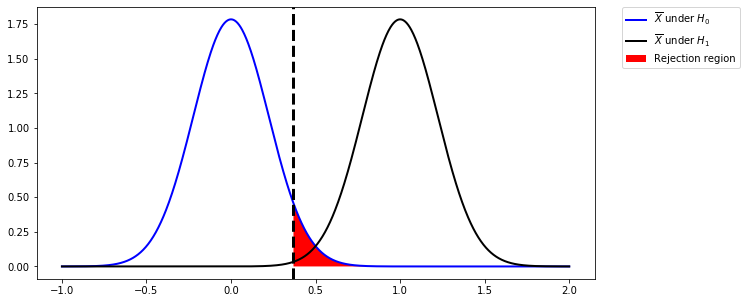

In [13]:
c, XBar, msg = hypothesisTest(X, alpha)
xx = np.linspace(-1., 2., 1000)
yy1 = [norm.pdf(x, 0., sigma/np.sqrt(len(X))) for x in xx]
yy2 = [norm.pdf(x, 1., sigma/np.sqrt(len(X))) for x in xx]
zeroLine = [0. for _ in xx]

plt.figure(figsize=(10,5))
plt.plot(xx, yy1, 'b', label="$\overline{X}$ under $H_0$", lw=2)
plt.plot(xx, yy2, 'k', label="$\overline{X}$ under $H_1$", lw=2)
plt.axvline(x=c, color='k', linestyle='--', linewidth=3)
plt.fill_between(xx, zeroLine, yy1, where=xx >= c, facecolor='red', interpolate=True, label="Rejection region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Power of the test

In [14]:
def powerTest(X, alpha, sigma):
    c, XBar, msg = hypothesisTest(X, alpha)
    return 1. - norm.cdf((c-1.)*np.sqrt(len(X))/sigma)

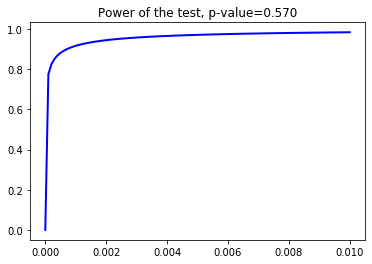

In [15]:
pValue = 1.-norm.cdf(np.mean(X)*np.sqrt(len(X))/sigma)
aa = np.linspace(0., 0.01, 100)
pp = [powerTest(X, a, sigma) for a in aa]
plt.plot(aa, pp, 'b', lw=2)
plt.title("Power of the test, p-value=%.3f" %pValue)
plt.show()